   Unnamed: 0     ID GenderType         Type     SubType       Article  \
0           1  39386        Men      Apparel  Bottomwear         Jeans   
1           2  59263      Women  Accessories     Watches       Watches   
2           4  53759        Men      Apparel     Topwear       Tshirts   
3           8  29114        Men  Accessories       Socks         Socks   
4          10   9204        Men     Footwear       Shoes  Casual Shoes   

  PrimaryColor Seasonal    Year     Use          Brand  
0         Blue   Summer  2012.0  Casual  Peter England  
1       Silver   Winter  2016.0  Casual          Titan  
2         Grey   Summer  2012.0  Casual           Puma  
3    Navy Blue   Summer  2012.0  Casual           Puma  
4        Black   Summer  2011.0  Casual           Puma  


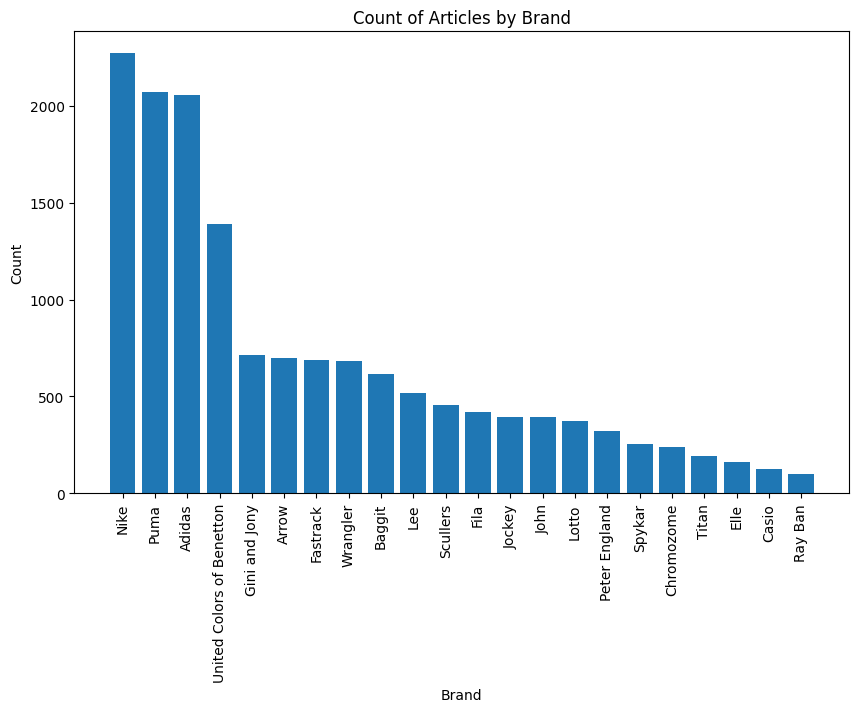

In [1]:
import zipfile
import io
import pandas as pd
import os
from PIL import Image
import matplotlib.pyplot as plt

# Path to the zip file
path = r'C:\Users\Anas\Downloads\branddataset.zip'

# Extracting the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('extracted_data')

extracted_folder = 'extracted_data/branddataset'
images_folder = os.path.join(extracted_folder, 'images')
csv_file_path = os.path.join(extracted_folder, 'brand_info.csv')

# Load CSV data using pandas
data = pd.read_csv(csv_file_path)

# Display the data
print(data.head())

# Count articles by brand
article_counts = data['Brand'].value_counts()

# Data visualization: Bar chart
plt.figure(figsize=(10, 6))
plt.bar(article_counts.index, article_counts.values)
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Count of Articles by Brand')
plt.xticks(rotation=90)
plt.show()

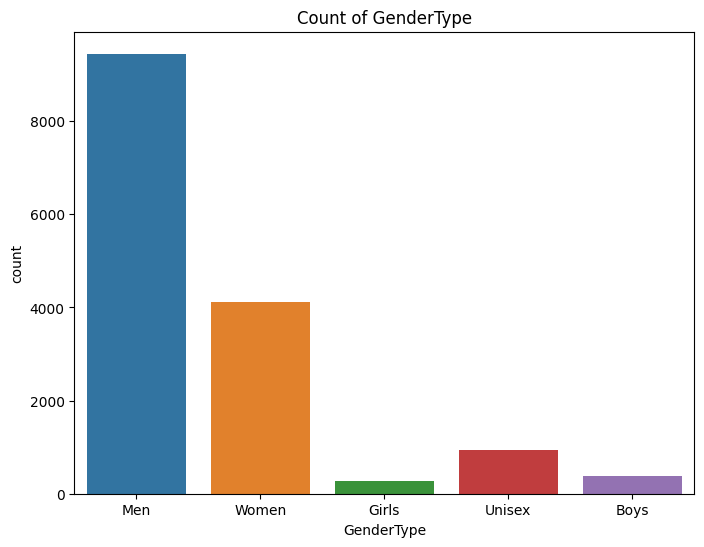

In [2]:
# Visualization 1: Countplot for GenderType
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.countplot(x='GenderType', data=data)
plt.title('Count of GenderType')
plt.show()

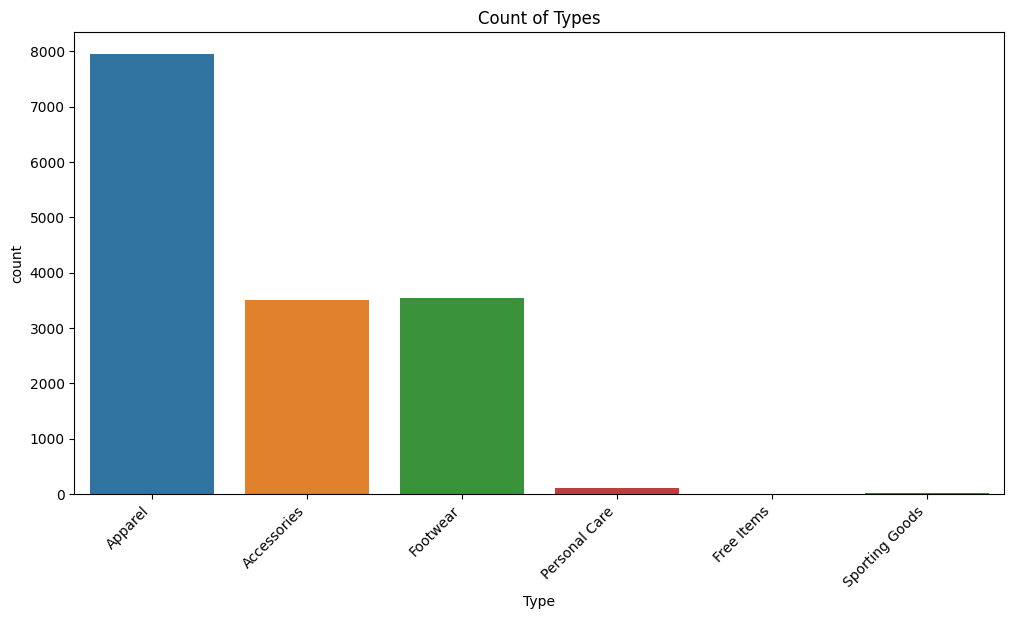

In [4]:
# Visualization 2: Countplot for Type
plt.figure(figsize=(12, 6))
sns.countplot(x='Type', data=data)
plt.title('Count of Types')
plt.xticks(rotation=45, ha='right')
plt.show()

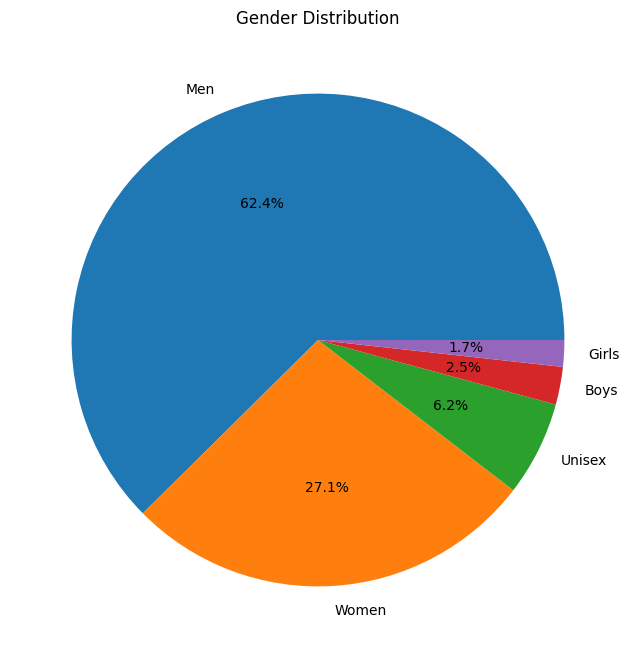

In [4]:
# Data visualization: Pie chart - Gender Distribution
gender_counts = data['GenderType'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

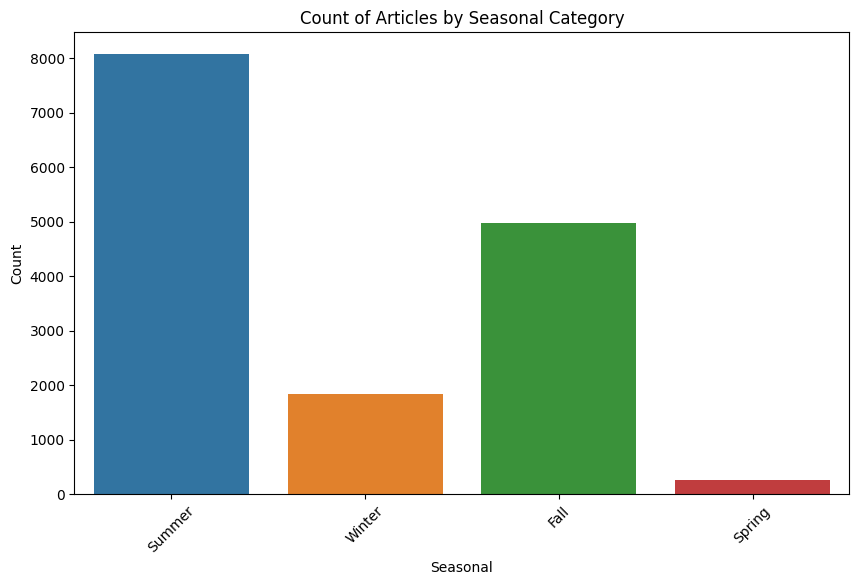

In [5]:
# Data visualization: Count plot - Seasonal Articles
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Seasonal')
plt.xlabel('Seasonal')
plt.ylabel('Count')
plt.title('Count of Articles by Seasonal Category')
plt.xticks(rotation=45)
plt.show()

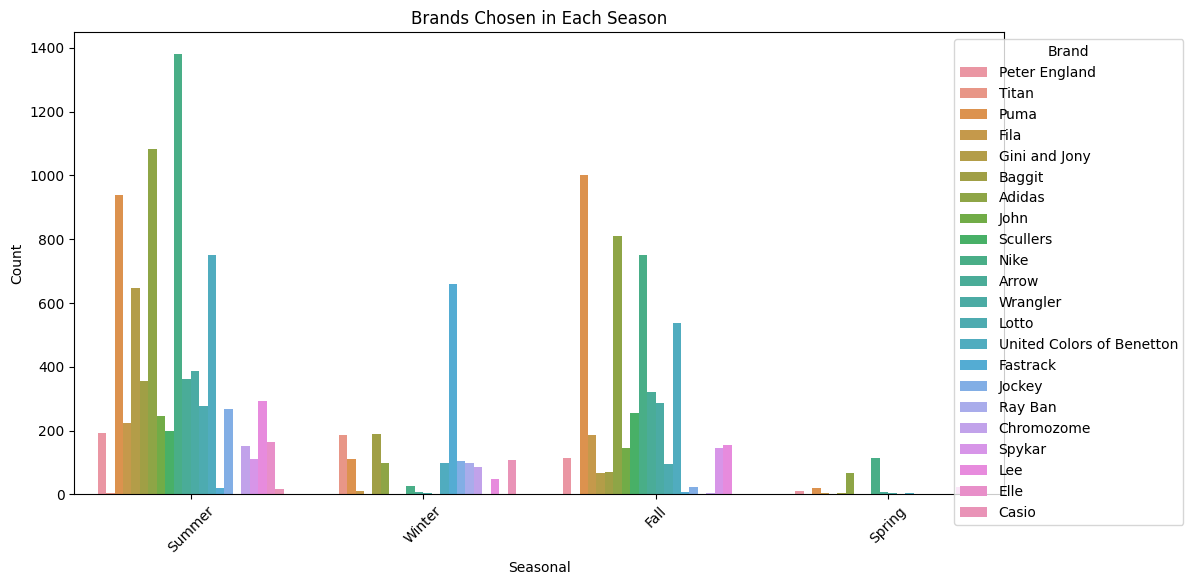

In [8]:
# Data visualization: Count plot - Brands Chosen in Each Season
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Seasonal', hue='Brand')
plt.xlabel('Seasonal')
plt.ylabel('Count')
plt.title('Brands Chosen in Each Season')
plt.xticks(rotation=45)
plt.legend(title='Brand', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

In [9]:
data.Brand.value_counts()

Nike                         2270
Puma                         2073
Adidas                       2057
United Colors of Benetton    1388
Gini and Jony                 713
Arrow                         696
Fastrack                      688
Wrangler                      682
Baggit                        618
Lee                           518
Scullers                      454
Fila                          421
Jockey                        393
John                          392
Lotto                         375
Peter England                 320
Spykar                        256
Chromozome                    241
Titan                         191
Elle                          164
Casio                         127
Ray Ban                       100
Name: Brand, dtype: int64

In [10]:
import pandas as pd
df_dummies = pd.get_dummies(data['Brand'],drop_first=True)
df_dummies = pd.concat([data,df_dummies],axis=1)

In [18]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


In [13]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15137 entries, 0 to 15136
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 15137 non-null  int64  
 1   ID                         15137 non-null  int64  
 2   GenderType                 15137 non-null  object 
 3   Type                       15137 non-null  object 
 4   SubType                    15137 non-null  object 
 5   Article                    15137 non-null  object 
 6   PrimaryColor               15131 non-null  object 
 7   Seasonal                   15136 non-null  object 
 8   Year                       15136 non-null  float64
 9   Use                        15133 non-null  object 
 10  Brand                      15137 non-null  object 
 11  Arrow                      15137 non-null  uint8  
 12  Baggit                     15137 non-null  uint8  
 13  Casio                      15137 non-null  uin

In [14]:
df_dummies.dropna(subset=['PrimaryColor','Use','Seasonal','Year'], inplace=True)

In [15]:
df_dummies.isna().sum()

Unnamed: 0                   0
ID                           0
GenderType                   0
Type                         0
SubType                      0
Article                      0
PrimaryColor                 0
Seasonal                     0
Year                         0
Use                          0
Brand                        0
Arrow                        0
Baggit                       0
Casio                        0
Chromozome                   0
Elle                         0
Fastrack                     0
Fila                         0
Gini and Jony                0
Jockey                       0
John                         0
Lee                          0
Lotto                        0
Nike                         0
Peter England                0
Puma                         0
Ray Ban                      0
Scullers                     0
Spykar                       0
Titan                        0
United Colors of Benetton    0
Wrangler                     0
dtype: i